<h1 style="color: #FECB05; text-align: center;"> PaCMAP </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Funcionamiento de PaCMAP</span>](#dim-curse)
- [<span style="color: #005C99;">Comparación con UMAP y TriMAP</span>](#reference)
- [<span style="color: #005C99;">Parámetros básicos de PaCMAP</span>](#reference)
- [<span style="color: #005C99;">Uso de PacMAP</span>](#reference)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h2 style="color: #007ACC;"> Introducción </h2>

PaCMAP (Pairwise Controlled Manifold Approximation Projection) es una técnica de reducción de dimensionalidad que busca mejorar la preservación tanto de la estructura global como de la local en comparación con otras técnicas como t-SNE, UMAP y TRIMAP. PaCMAP es particularmente útil para la visualización y el análisis de datos de alta dimensionalidad, ya que permite mantener las relaciones entre los puntos de datos en un espacio de menor dimensionalidad.

---

<h2 style="color: #007ACC;"> Funcionamiento de PaCMAP </h2>

PaCMAP funciona a través de la optimización de relaciones entre pares de puntos de datos, controlando explícitamente las relaciones de vecinos cercanos, puntos lejanos y pares aleatorios. A continuación, se describe su funcionamiento en detalle:


<h3 id="subsection1-1" style="color: #003366;"> Selección de Vecinos Cercanos, Puntos Lejanos y Pares Aleatorios</h3>

Para cada punto en el espacio de alta dimensionalidad, PaCMAP selecciona tres tipos de relaciones:

- Vecinos Cercanos (Neighbors): PaCMAP selecciona los puntos más cercanos a un punto dado. Estos vecinos ayudan a preservar la estructura local de los datos.
- Puntos Lejanos (Mid-neighbors): PaCMAP selecciona puntos que están a una distancia intermedia del punto dado. La inclusión de estos puntos ayuda a preservar la estructura global.
- Pares Aleatorios (Random pairs): Se seleccionan pares aleatorios de puntos para regularizar el modelo y prevenir sobreajustes.

<h3 id="subsection1-1" style="color: #003366;"> Construcción de Pares de Relación</h3>

Una vez que se han seleccionado los vecinos cercanos, puntos lejanos y pares aleatorios, PaCMAP construye relaciones entre estos pares de puntos. Esto se hace para todos los puntos del conjunto de datos.

<h3 id="subsection1-1" style="color: #003366;"> Optimización </h3>

PaCMAP utiliza un algoritmo de optimización para proyectar los puntos en el espacio de menor dimensionalidad. Este proceso de optimización se realiza mediante los siguientes pasos:

- Función de Costo: La función de costo de PaCMAP penaliza las discrepancias en la proximidad relativa de los puntos en el espacio de alta y baja dimensionalidad. La función de costo se diseña para equilibrar la preservación de las relaciones locales y globales.
- Gradiente Descendente: PaCMAP utiliza el gradiente descendente para minimizar la función de costo. Durante cada iteración del algoritmo de optimización, los puntos en el espacio reducido se ajustan para reducir la penalización total.
- Regularización: El uso de pares aleatorios ayuda a regularizar el modelo y asegurar que la proyección final sea estable y generalizable.


---

<h2 style="color: #007ACC;"> Comparación con UMAP y TriMAP </h2>

- Preservación de la Estructura Global y Local: PaCMAP pone un énfasis equilibrado en la preservación de la estructura global y local mediante la inclusión de vecinos cercanos, puntos lejanos y pares aleatorios. UMAP se centra más en la estructura local, mientras que TRIMAP se enfoca más en la estructura global.
- Construcción de Relaciones: PaCMAP construye relaciones de pares de puntos (vecinos cercanos, puntos lejanos y pares aleatorios) en lugar de triplets como en TRIMAP.
- Parámetros: PaCMAP introduce parámetros específicos como n_neighbors, MN_ratio y FP_ratio para controlar el equilibrio entre la estructura local y global, así como la regularización.

---

<h2 style="color: #007ACC;"> Parámetros básicos de PaCMAP </h2>

- n_neighbors: Define el número de puntos cercanos que se considerarán para cada punto. Afecta la preservación de la estructura local.
- MN_ratio: Proporción de puntos lejanos (mid-neighbors) respecto a los vecinos cercanos. Afecta la preservación de la estructura global.
- FP_ratio: Proporción de pares aleatorios respecto a los vecinos cercanos. Ayuda a regularizar el modelo.
- random_state: Una semilla para el generador de números aleatorios que se utiliza para la inicialización y para garantizar la reproducibilidad de los resultados.

---

<h2 style="color: #007ACC;"> Uso de PacMAP </h2>

Para instalar la biblioteca `pacmap`, usa el siguiente comando:

```
!pip install pacmap
```

<h3 id="subsection1-1" style="color: #003366;"> Ejemplo 1: datos iris</h3>

In [1]:
import pacmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])

In [3]:
# Configurar y aplicar PaCMAP
reducer = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, random_state=42)
embedding = reducer.fit_transform(df_scaled)

# Convertir el resultado a un DataFrame
embedding_df = pd.DataFrame(embedding, columns=['PaCMAP1', 'PaCMAP2'])
embedding_df['species'] = df['species']

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


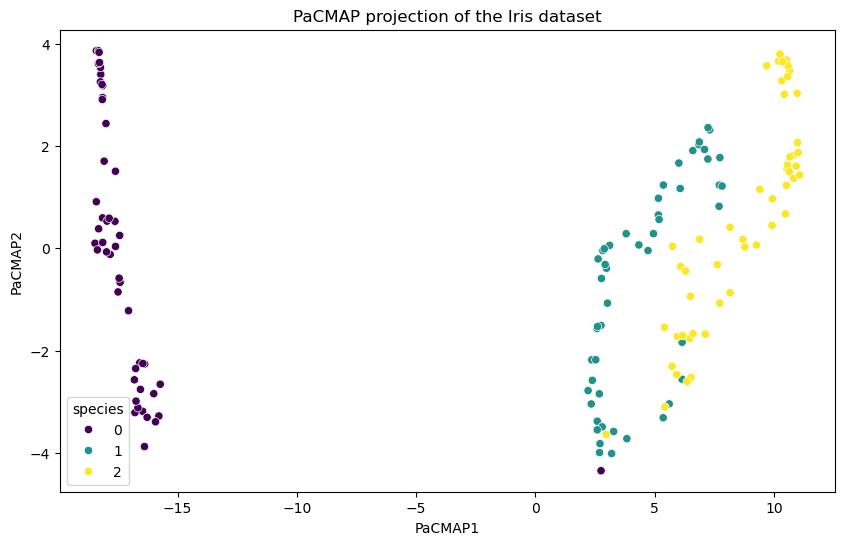

In [4]:
# Visualizar el resultado usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PaCMAP1', y='PaCMAP2', hue='species', palette='viridis', data=embedding_df)
plt.title('PaCMAP projection of the Iris dataset')
plt.show()

<h3 id="subsection1-1" style="color: #003366;"> Ejemplo 2: datos de dígitos</h3>

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [6]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad inicial con PCA para acelerar PaCMAP
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Configurar y aplicar PaCMAP con diferentes valores de n_neighbors, MN_ratio y FP_ratio
reducer_1 = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, random_state=42)
embedding_1 = reducer_1.fit_transform(X_pca)

reducer_2 = pacmap.PaCMAP(n_neighbors=20, MN_ratio=1.0, FP_ratio=1.0, random_state=42)
embedding_2 = reducer_2.fit_transform(X_pca)

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


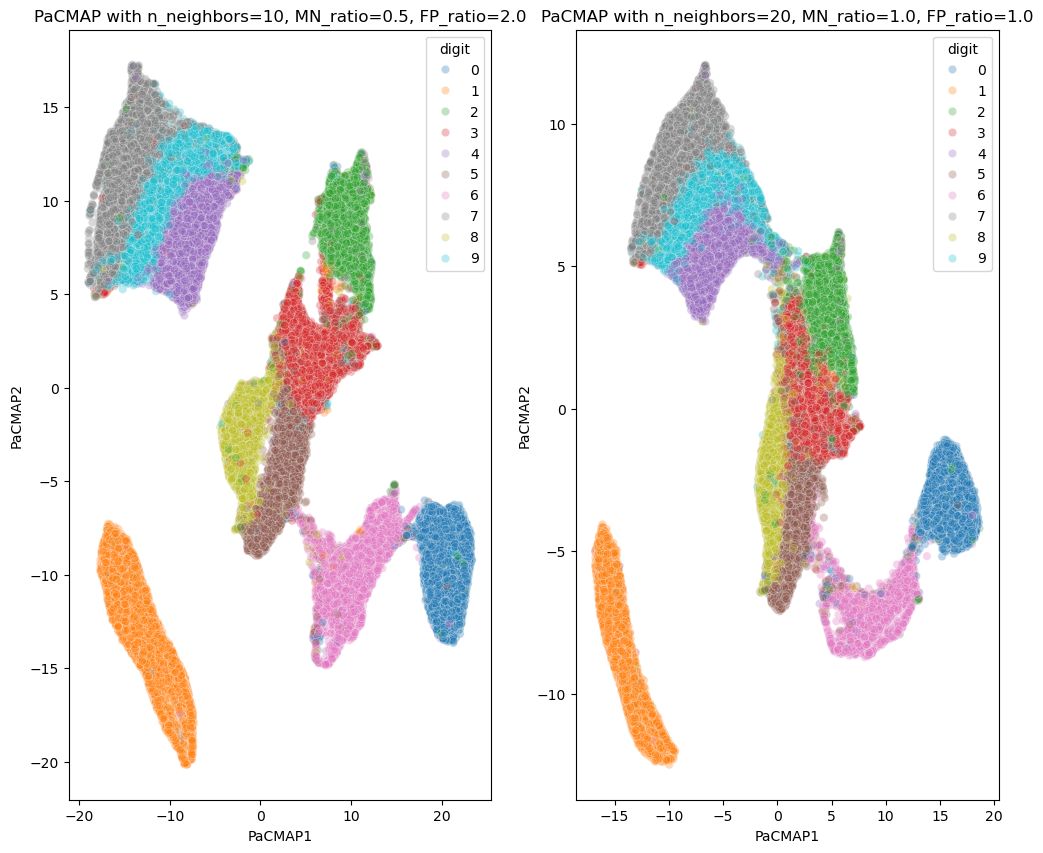

In [8]:
# Convertir los resultados a DataFrames
embedding_df_1 = pd.DataFrame(embedding_1, columns=['PaCMAP1', 'PaCMAP2'])
embedding_df_1['digit'] = y

embedding_df_2 = pd.DataFrame(embedding_2, columns=['PaCMAP1', 'PaCMAP2'])
embedding_df_2['digit'] = y

# Visualizar los resultados usando Seaborn
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PaCMAP1', y='PaCMAP2', hue='digit', palette='tab10', data=embedding_df_1, legend='full', alpha=0.3)
plt.title('PaCMAP with n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PaCMAP1', y='PaCMAP2', hue='digit', palette='tab10', data=embedding_df_2, legend='full', alpha=0.3)
plt.title('PaCMAP with n_neighbors=20, MN_ratio=1.0, FP_ratio=1.0')

plt.show()

<h3 id="subsection1-1" style="color: #003366;"> Ejemplo 3: Comparaciones entre diferentes técnicas de visualización</h3>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import trimap
import pacmap
from sklearn.preprocessing import StandardScaler

In [10]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

In [11]:
# Reducir la dimensionalidad con PCA a 50 componentes para acelerar t-SNE, UMAP, TRIMAP y PaCMAP
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# UMAP
reducer_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer_umap.fit_transform(X_pca)

# TRIMAP
reducer_trimap = trimap.TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance='euclidean')
X_trimap = reducer_trimap.fit_transform(X_pca)

# PaCMAP
reducer_pacmap = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, random_state=42)
X_pacmap = reducer_pacmap.fit_transform(X_pca)

# PCA (2 componentes)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


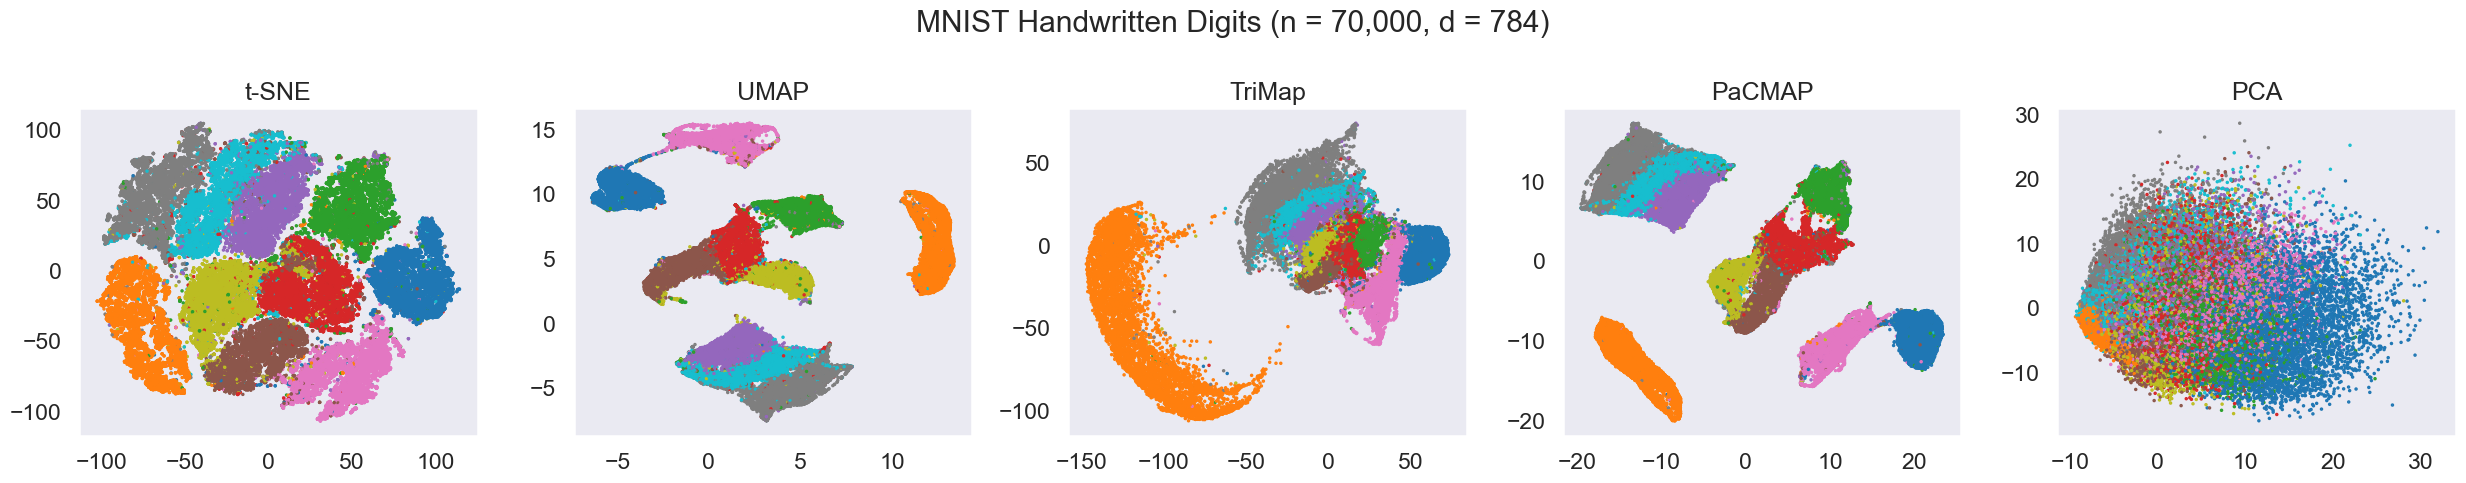

In [12]:
# Configurar el estilo de los gráficos
sns.set(style='dark', context='talk', rc={'figure.figsize': (20, 10)})

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# t-SNE
axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=1)
axes[0].set_title('t-SNE')

# UMAP
axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=1)
axes[1].set_title('UMAP')

# TRIMAP
axes[2].scatter(X_trimap[:, 0], X_trimap[:, 1], c=y, cmap='tab10', s=1)
axes[2].set_title('TriMap')

# PaCMAP
axes[3].scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=y, cmap='tab10', s=1)
axes[3].set_title('PaCMAP')

# PCA
axes[4].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', s=1)
axes[4].set_title('PCA')

# Añadir títulos y ajustar diseño
fig.suptitle('MNIST Handwritten Digits (n = 70,000, d = 784)')
plt.tight_layout()
plt.show()

In [13]:
# Definir configuraciones de los algoritmos
tsne_params = [10, 20, 40]
umap_params = [10, 20, 40]
trimap_params = [8, 10, 15]
pacmap_params = [(10, 0.5, 2.0)]  # Solo una configuración de PaCMAP

# Aplicar t-SNE
X_tsne = [TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X_pca) for perplexity in tsne_params]

# Aplicar UMAP
X_umap = [umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42).fit_transform(X_pca) for n in umap_params]

# Aplicar TRIMAP
X_trimap = [trimap.TRIMAP(n_inliers=n, n_outliers=5, n_random=5, distance='euclidean').fit_transform(X_pca) for n in trimap_params]

# Aplicar PaCMAP (solo una configuración)
reducer_pacmap = pacmap.PaCMAP(n_neighbors=pacmap_params[0][0], MN_ratio=pacmap_params[0][1], FP_ratio=pacmap_params[0][2], random_state=42)
X_pacmap = reducer_pacmap.fit_transform(X_pca)

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/pacmap/pacmap.py:822: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Wa

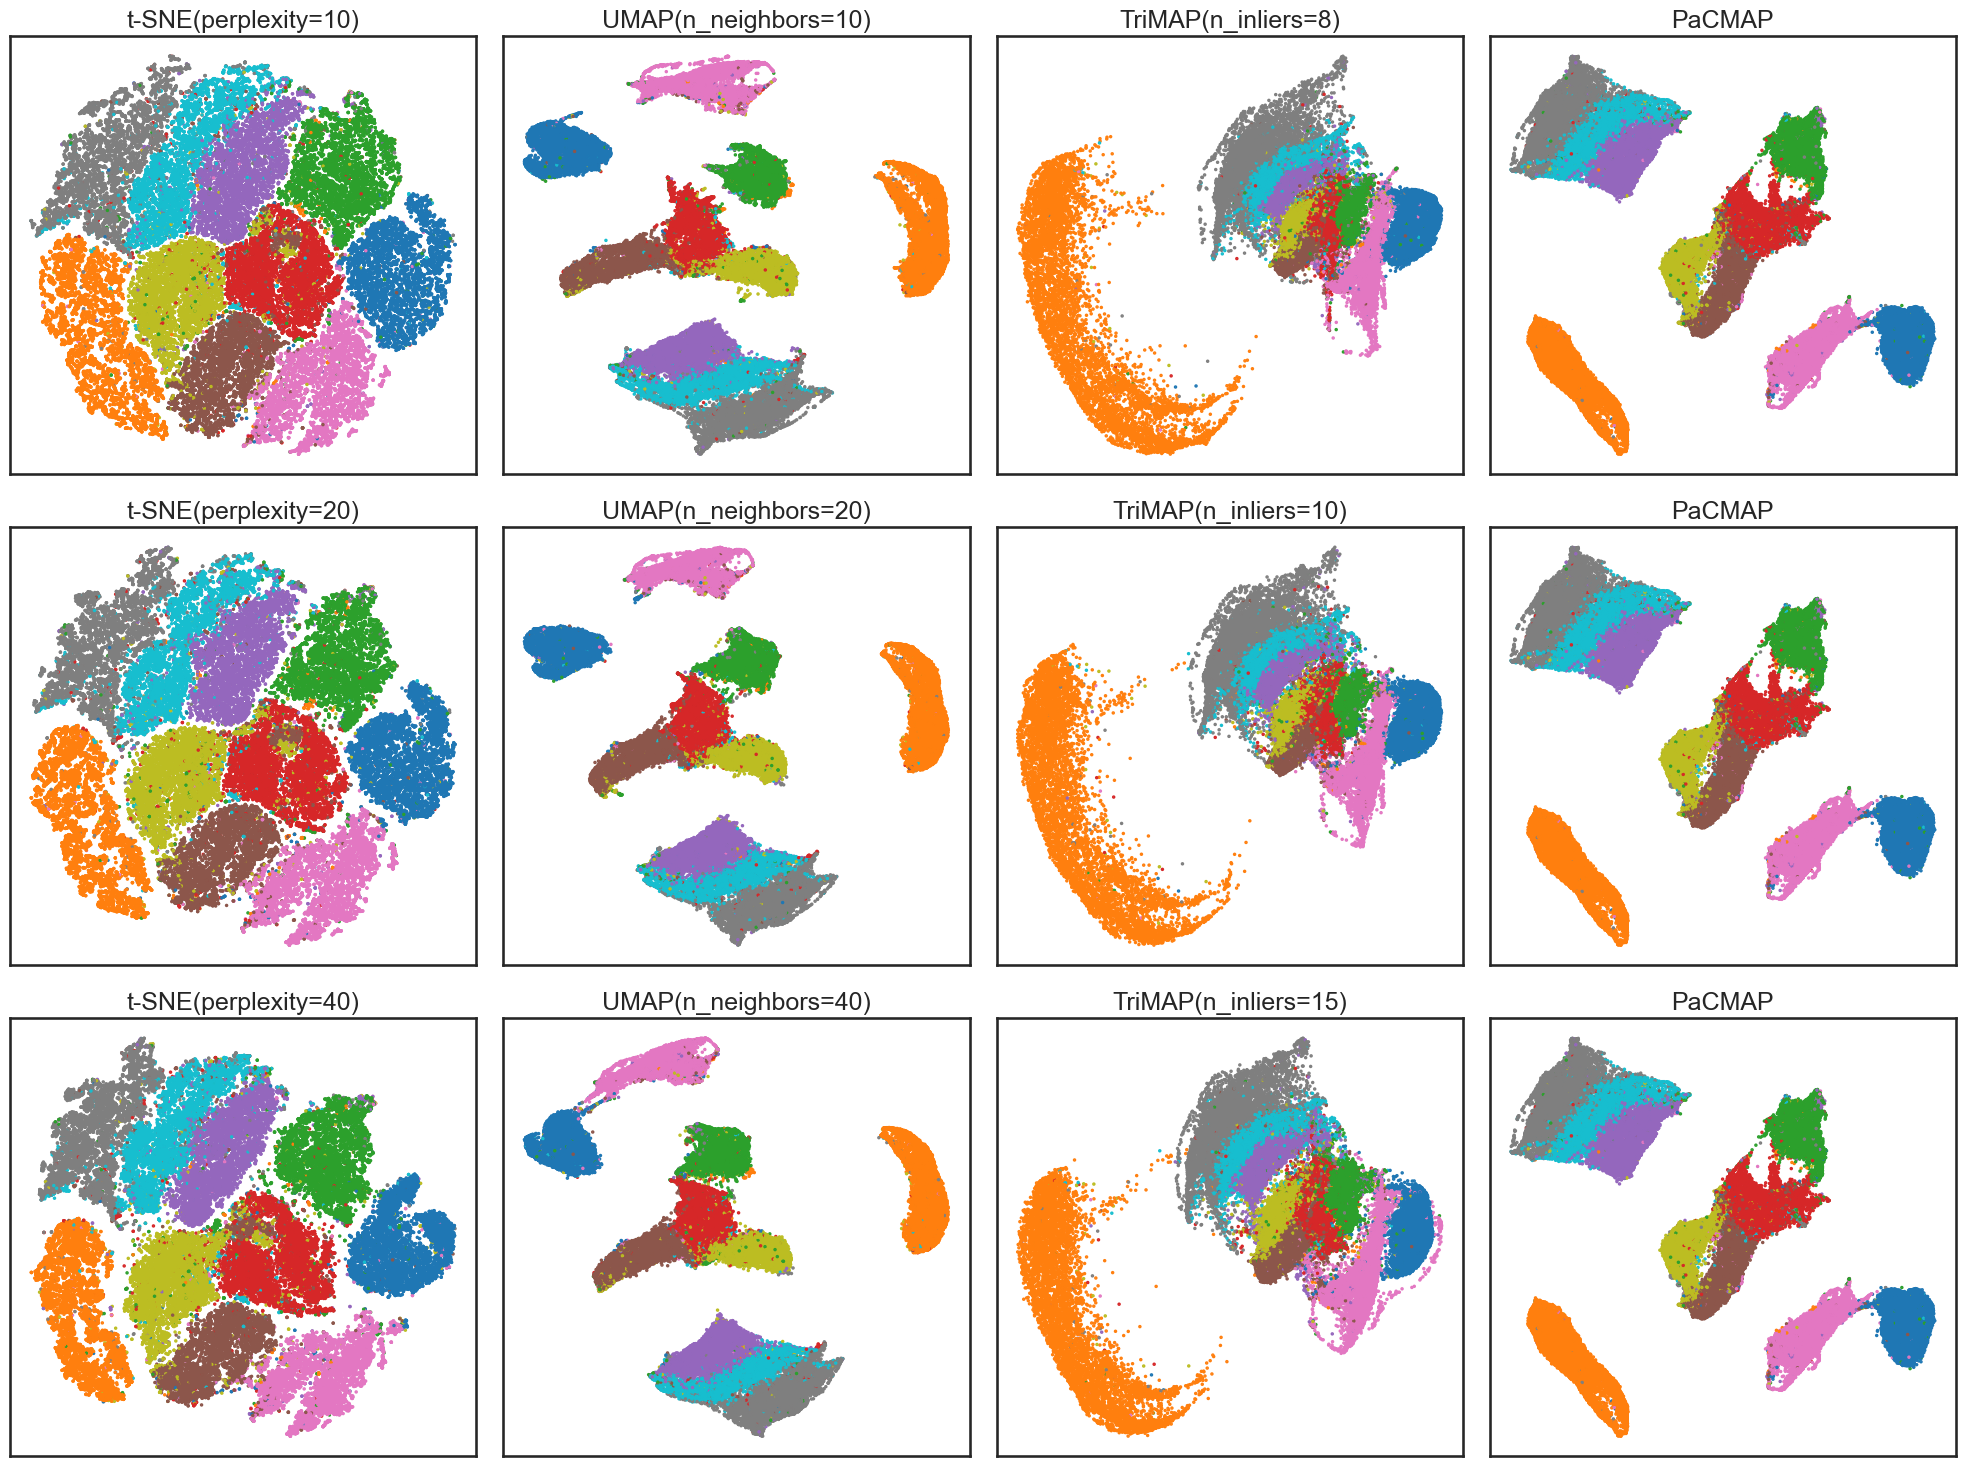

In [14]:
# Configurar el estilo de los gráficos
sns.set(style='white', context='talk', rc={'figure.figsize': (15, 15)})

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# t-SNE
for i, ax in enumerate(axes[:, 0]):
    ax.scatter(X_tsne[i][:, 0], X_tsne[i][:, 1], c=y, cmap='tab10', s=1)
    ax.set_title(f't-SNE(perplexity={tsne_params[i]})')
    ax.set_xticks([])
    ax.set_yticks([])

# UMAP
for i, ax in enumerate(axes[:, 1]):
    ax.scatter(X_umap[i][:, 0], X_umap[i][:, 1], c=y, cmap='tab10', s=1)
    ax.set_title(f'UMAP(n_neighbors={umap_params[i]})')
    ax.set_xticks([])
    ax.set_yticks([])

# TRIMAP
for i, ax in enumerate(axes[:, 2]):
    ax.scatter(X_trimap[i][:, 0], X_trimap[i][:, 1], c=y, cmap='tab10', s=1)
    ax.set_title(f'TriMAP(n_inliers={trimap_params[i]})')
    ax.set_xticks([])
    ax.set_yticks([])

# PaCMAP (repetir la misma visualización en todas las filas)
for ax in axes[:, 3]:
    ax.scatter(X_pacmap[:, 0], X_pacmap[:, 1], c=y, cmap='tab10', s=1)
    ax.set_title('PaCMAP')
    ax.set_xticks([])
    ax.set_yticks([])

# Ajustar el diseño
plt.tight_layout()
plt.show()

<h3 id="subsection1-1" style="color: #003366;"> Ejemplo 4: datos mamut</h3>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap
import trimap
import pacmap
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [16]:
mammoth = pd.read_json('../Datos/mammoth_3d.json')

In [17]:
mammoth

,0,1,2
0,430.826,106.864,24.492
1,397.734,99.293,14.370
2,480.505,80.876,131.561
3,422.736,87.715,13.504
4,414.840,113.363,78.061
...,...,...,...
9995,492.742,-114.477,107.954
9996,502.376,-94.579,117.065
9997,467.228,-168.295,97.806
9998,494.780,-111.272,115.444


In [18]:
X = mammoth[[0, 1, 2]].values

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Definir configuraciones de los algoritmos
tsne_params = [10, 125, 250]
umap_params = [10, 20, 40]
trimap_params = [10, 20, 40]
pacmap_params = [(10, 0.5, 2.0)]  # Solo una configuración de PaCMAP

# Aplicar t-SNE
X_tsne = [TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X) for perplexity in tsne_params]

# Aplicar UMAP
X_umap = [umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42).fit_transform(X) for n in umap_params]

# Aplicar TRIMAP
X_trimap = [trimap.TRIMAP(n_inliers=n, n_outliers=5, n_random=5, distance='euclidean').fit_transform(X) for n in trimap_params]

# Aplicar PaCMAP (solo una configuración)
reducer_pacmap = pacmap.PaCMAP(n_neighbors=pacmap_params[0][0], MN_ratio=pacmap_params[0][1], FP_ratio=pacmap_params[0][2], random_state=42)
X_pacmap = reducer_pacmap.fit_transform(X)

/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/juanfelipe/miniforge3/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# Configurar el estilo de los gráficos
sns.set(style='white', context='talk', rc={'figure.figsize': (20, 20)})

fig = plt.figure(figsize=(20, 20))

# Plot original mammoth in 3D
ax = fig.add_subplot(4, 5, 2, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], s=1)
#ax.set_xlim(100, 600)
#ax.set_ylim(-200, 400)
#ax.set_zlim(0, 200)
ax.set_title('Original Mammoth')
ax.view_init(90, -90)

# t-SNE
for i, perplexity in enumerate(tsne_params):
    ax = fig.add_subplot(4, 5, i + 6)
    ax.scatter(X_tsne[i][:, 0], X_tsne[i][:, 1], cmap='tab10', s=1)
    ax.set_title(f't-SNE(perplexity={perplexity})')
    ax.set_xticks([])
    ax.set_yticks([])

# UMAP
for i, n_neighbors in enumerate(umap_params):
    ax = fig.add_subplot(4, 5, i + 11)
    ax.scatter(X_umap[i][:, 0], X_umap[i][:, 1], cmap='tab10', s=1)
    ax.set_title(f'UMAP(NN={n_neighbors})')
    ax.set_xticks([])
    ax.set_yticks([])

# TRIMAP
for i, n_inliers in enumerate(trimap_params):
    ax = fig.add_subplot(4, 5, i + 16)
    ax.scatter(X_trimap[i][:, 0], X_trimap[i][:, 1], cmap='tab10', s=1)
    ax.set_title(f'TriMAP(NN={n_inliers})')
    ax.set_xticks([])
    ax.set_yticks([])

# PaCMAP (repetir la misma visualización en una celda)
ax = fig.add_subplot(4, 5, 14)
ax.scatter(X_pacmap[:, 0], X_pacmap[:, 1], cmap='tab10', s=1)
ax.set_title('PaCMAP(default)')
ax.set_xticks([])
ax.set_yticks([])

# Ajustar el diseño
plt.tight_layout()
plt.show()

---

<h2 id="reference" style="color: #007ACC;">Referencias</h2>

- Artículo original con la propuesta del modelo PacMAP: https://jmlr.org/papers/volume22/20-1061/20-1061.pdf
- Repositorio de la librería `pacmap` de Python: https://github.com/YingfanWang/PaCMAP?tab=readme-ov-file